tensorflow-2-0-with-fashion-mnist-dataset
=======

The following notebook is based on https://medium.com/datadriveninvestor/introduction-to-tensorflow-2-0-with-fashion-mnist-dataset-2f243423c563 which in tuen is based on https://www.tensorflow.org/tutorials/quickstart/beginner

load tensor flow
-----------------

!pip install matplotlib

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

prepare data
-------------
load  data

In [110]:
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

check shape

In [111]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

definig class name

In [112]:
class_name = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal',
           'shirt', 'sneaker', 'bag', 'ankle boot']

plot image using colorbar

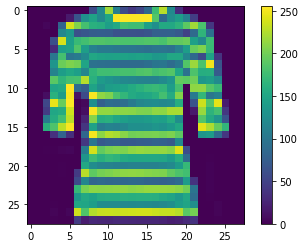

In [113]:
plt.figure()
plt.imshow(X_train[26])
plt.colorbar()

Preprocessing/Wrangle data
--------------------
changing scale 0-255 to 0-1

In [114]:
X_train = X_train/255.0
X_test = X_test/255.0

checking plot image using colorbar again

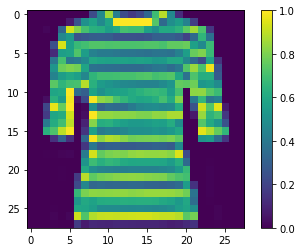

In [115]:
plt.figure()
plt.imshow(X_train[26])
plt.colorbar()

building model
-------------------

using keras to build out the model

In [116]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential()

we can pass an array in sequential model or just add another layer

In [117]:
model.add(Flatten(input_shape = (28,28)))

flatten is used to change input data in 1d

In [118]:
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


compilation of our model

In [119]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
             

train model
-----------------
fit the model

In [120]:
model.fit(X_train, y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5362 - accuracy: 0.8099
Epoch 2/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4017 - accuracy: 0.8547


chechking test_loss, test_acc

In [121]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss, test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.3994 - accuracy: 0.8578


(0.3993788957595825, 0.8578000068664551)

validated model
-----------------
check accuracy (should be around 85%) 

In [122]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test)
accuracy_score(y_test,y_pred)

0.8578

checking pred

In [123]:
x=16
pred = model.predict(X_test)
pred[x]

array([7.6895789e-03, 1.7691294e-03, 9.4758779e-01, 1.0859231e-03,
       6.0753278e-03, 8.0673863e-06, 3.5438780e-02, 1.8814700e-06,
       3.3231702e-04, 1.1195598e-05], dtype=float32)

now lets make it a little more human readable and use probability

In [124]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

pred = probability_model.predict(X_test)

so now we should see for 10 classes the propability that the image is of each one (and hopefull our class is the highest)

In [125]:
pred[x]

array([0.08662906, 0.08611768, 0.22174619, 0.08605887, 0.08648933,
       0.08596616, 0.0890666 , 0.08596563, 0.08599404, 0.08596643],
      dtype=float32)

look like it is, so plotting with image

2

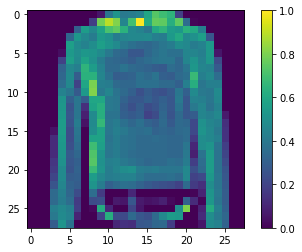

In [126]:
plt.figure()
plt.imshow(X_test[x])
plt.colorbar()
np.argmax(pred[x])

Now to use out model later we need to save model and then zip it.

In [127]:
import os
mobilenet_save_path = os.path.join('./model/', "imageclass/2/")
tf.saved_model.save(probability_model, mobilenet_save_path)
!tar -zcvf model.tar.gz model/

INFO:tensorflow:Assets written to: ./model/imageclass/2/assets


INFO:tensorflow:Assets written to: ./model/imageclass/2/assets


model/
model/imageclass/
model/imageclass/2/
model/imageclass/2/variables/
model/imageclass/2/variables/variables.data-00000-of-00001
model/imageclass/2/variables/variables.index
model/imageclass/2/saved_model.pb
model/imageclass/2/assets/


check decoding of prediction

In [128]:
encoded = np.argmax(pred[x])

In [129]:
class_name[encoded]

'pullover'